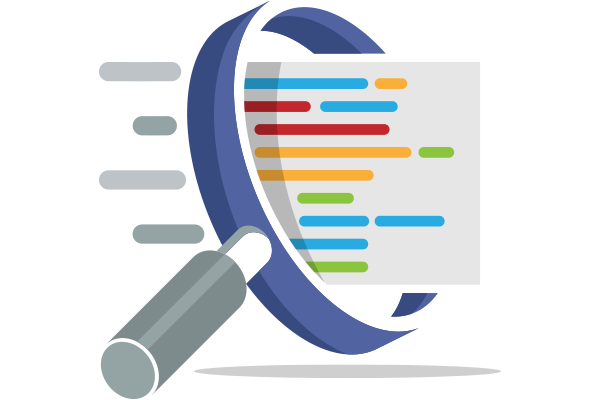

In [223]:
#Importing necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [224]:
def finalcluster(dataframe):
    
    def clusters(row):
        return "Group "+str(int(row.Group))
    
    
    Group_Column= dataframe.apply(clusters,axis='columns')
    
    dataframe.loc[:,'Group']=Group_Column
    
    return dataframe

In [225]:
result3=pd.read_csv(r'C:\Users\tarandeepsingh1\Downloads\Vision\FIFA Project\kmeans_result_3.csv')
result4=pd.read_csv(r'C:\Users\tarandeepsingh1\Downloads\Vision\FIFA Project\kmeans_result_4.csv')
result2=pd.read_csv(r'C:\Users\tarandeepsingh1\Downloads\Vision\FIFA Project\kmeans_result_2.csv')
result5=pd.read_csv(r'C:\Users\tarandeepsingh1\Downloads\Vision\FIFA Project\kmeans_result_5.csv')

In [226]:
result2.head()

,Unnamed: 0,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,Group,N_Clusters
0,0,Cristiano Ronaldo,33,187,83,Portugal,Juventus,94,94,77000000,...,35.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
1,3254,E. Ponce,21,178,78,Argentina,AEK Athens,72,80,4700000,...,39.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
2,3255,O. Govea,22,176,68,Mexico,Royal Antwerp FC,72,80,3900000,...,69.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
3,3256,A. Blin,21,184,78,France,Amiens SC,72,80,4000000,...,72.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
4,3257,B. Fernández,23,171,74,Argentina,Club Necaxa,72,80,4600000,...,27.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2


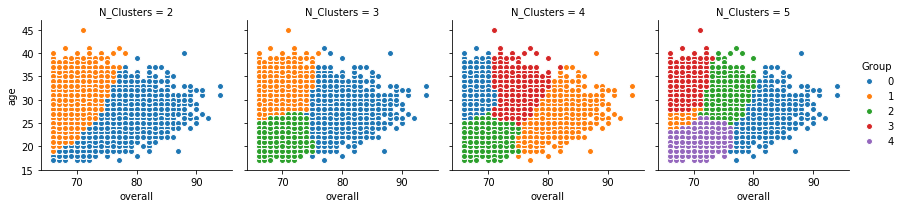

In [227]:
complete_df=pd.concat([result2,result3,result4,result5],axis=0)
g = sns.FacetGrid(complete_df, col="N_Clusters",  hue="Group")
g = (g.map(plt.scatter, "overall", "age",edgecolor="w").add_legend())

In [228]:
result2=finalcluster(result2)
result3=finalcluster(result3)
result4=finalcluster(result4)
result5=finalcluster(result5)

In [229]:
result2.drop(['Unnamed: 0'],axis=1,inplace=True)
result3.drop(['Unnamed: 0'],axis=1,inplace=True)
result4.drop(['Unnamed: 0'],axis=1,inplace=True)
result5.drop(['Unnamed: 0'],axis=1,inplace=True)
results=[result2,result3,result4,result5]

In [207]:
'''for result in results:
    cluster_mean_overall=[[result4.groupby(['Group']).overall.mean(),result4.groupby(['Group']).age.mean()],
                      [result3.groupby(['Group']).overall.mean(),result3.groupby(['Group']).age.mean()]]
    print cluster_mean_overall'''

[[Group
  Group 0    71.348204
  Group 1    67.118030
  Group 2    77.449412
  Group 3    64.076791
  Name: overall, dtype: float64, Group
  Group 0    24.167729
  Group 1    30.653413
  Group 2    29.126588
  Group 3    22.479028
  Name: age, dtype: float64], [Group
  Group 0    75.684413
  Group 1    65.338876
  Group 2    67.689405
  Name: overall, dtype: float64, Group
  Group 0    26.658891
  Group 1    22.798416
  Group 2    30.776371
  Name: age, dtype: float64]]

My requirements for players were mentioned in Clutering notebook.

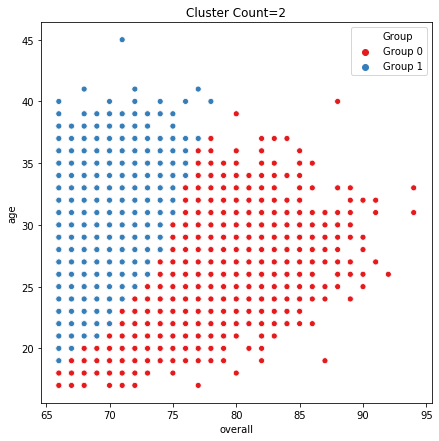

In [238]:
#Lets see how do clulsters work with overall performance on a scatter plot
plt.figure(figsize=(7,7))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(data=result2,x='overall',y='age',hue='Group',legend='full',palette='Set1')
plt.title('Cluster Count=2')
plt.savefig('Cluster_2_scatterresults.png')
plt.show()

While cluster size 2 does not provide much intel, Group 0 is our potential cluster of interest.

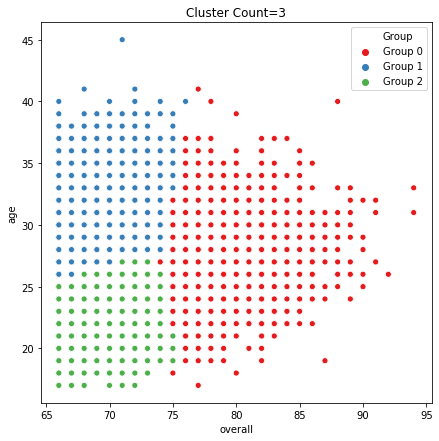

In [237]:
#Lets see how do clulsters work with overall performance on a scatter plot
plt.figure(figsize=(7,7))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(data=result3,x='overall',y='age',hue='Group',legend='full',palette='Set1')
plt.title('Cluster Count=3')
plt.savefig('Cluster_3_scatterresults.png')
plt.show()

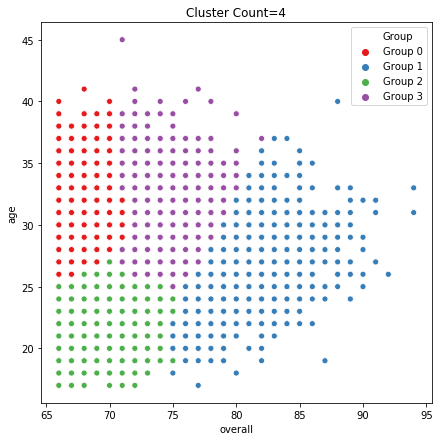

In [235]:
#Lets see how do clulsters work with overall performance on a scatter plot
plt.figure(figsize=(7,7))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(data=result4,x='overall',y='age',hue='Group',legend='full',palette='Set1')
plt.title('Cluster Count=4')
plt.savefig('Cluster_4_scatterresults.png')
plt.show()

We can see that Cluster Size 4 gives us more differentiated groups, Group 3 (formerly Group 0 for Cluster Size 2) 
has been more refined. Lets take this one step ahead with Cluster Size 5.

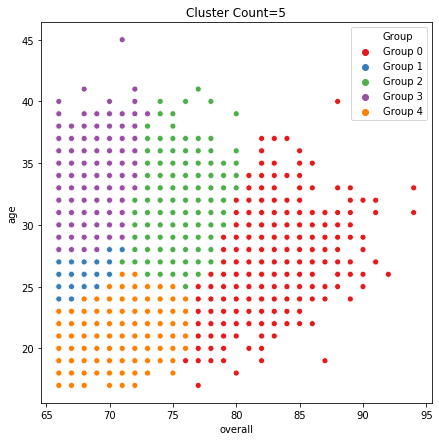

In [234]:
#Lets see how do clulsters work with overall performance on a scatter plot
plt.figure(figsize=(7,7))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(data=result5,x='overall',y='age',hue='Group',legend='full',palette='Set1')
plt.title('Cluster Count=5')
plt.savefig('Cluster_5_scatterresults.png')
plt.show()

Yes! Group 0 covers most of our previously mentioned requirements.


In [242]:
#Lets see the young prospects in Group 0, what has kmeans chosen for us:
result5[result5.age<23]. head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,Group,N_Clusters
18,T. Alexander-Arnold,19,180,69,England,Liverpool,78,88,14000000,36000,...,74.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,Group 0,5
19,H. Aouar,20,175,70,France,Olympique Lyonnais,78,88,16500000,44000,...,63.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,Group 0,5
20,Dani Ceballos,21,179,70,Spain,Real Madrid,78,87,16000000,92000,...,68.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,Group 0,5
21,M. Akanji,22,187,85,Switzerland,Borussia Dortmund,78,87,14000000,39000,...,78.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,Group 0,5
22,F. Kessié,21,183,76,Ivory Coast,Milan,78,87,16000000,22000,...,78.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,Group 0,5


Great! Trent and Dani Ceballos are actually strong players with lot of potential. Seems like kmeans is working for us.

Let us include more parameters (playing position, attributes) for a more efficient localization of lucrative players.